# Pre-processing corpora


In [1]:
import os
from unidecode import unidecode

def preprocess_text_file(input_file, output_file, removal, max_rows=1000):
    try:
        # Read the content of the input file, limited to the first 1000 rows
        with open(input_file, 'r', encoding='utf-8') as file:
            content = file.read(max_rows)

        # Remove characters in the 'removal' set
        cleaned_content = ''.join(char for char in content if char not in removal)

        # Use unidecode to convert Unicode to ASCII
        cleaned_content = unidecode(cleaned_content)

        # Write the modified content back to the output file
        with open(output_file, 'w', encoding='utf-8') as file:
            file.write(cleaned_content)

        #print(f"Text file '{input_file}' preprocessed and saved to '{output_file}'.")
    
    except FileNotFoundError:
        print(f"Error: File '{input_file}' not found.")

# Add escape characters, single quotes, and commas to the removal_characters
removal_characters = set("0123456789!@#$%^&*()_-+=<>?,./:;{}[]|`~\"'\\\t\n\r,")

def preprocess_files_in_directory(directory, removal, max_rows=1000):
    for subdir, _, files in os.walk(directory):
        for file in files:
            input_file_path = os.path.join(subdir, file)
            output_file_name = f"pre-{file}"
            output_file_path = os.path.join(subdir, output_file_name)
            preprocess_text_file(input_file_path, output_file_path, removal, max_rows)
            #print("Pre-processed", str(input_file_path))

# Example usage:
corpus_directory = r'C:\Users\wiklu\OneDrive\Skrivbord\LTU\LTU\D7041E\d7041e_labs_JMEW\lab3\data\corpus'
all_language_dirs = ['bg', 'cs', 'da', 'de', 'el', 'es', 'et', 'fi', 'fr', 'hu', 'it', 'lv', 'nl', 'pl', 'pt', 'ro', 'sk', 'sl', 'sv']

preprocess_files_in_directory(corpus_directory, removal_characters)


# Pre-processing europarl


In [2]:
import os
from unidecode import unidecode

def preprocess_text_file(input_file, output_file, removal, max_rows=1000):
    try:
        # Read the content of the input file, limited to the first 1000 rows
        with open(input_file, 'r', encoding='utf-8') as file:
            content = file.read(max_rows)

        # Remove characters in the 'removal' set
        cleaned_content = ''.join(char for char in content if char not in removal)

        # Use unidecode to convert Unicode to ASCII
        cleaned_content = unidecode(cleaned_content)

        # Write the modified content back to the output file
        with open(output_file, 'w', encoding='utf-8') as file:
            file.write(cleaned_content)
        #print(f"Text file '{input_file}' preprocessed and saved to '{output_file}'.")
    
    except FileNotFoundError:
        print(f"Error: File '{input_file}' not found.")

# Add escape characters, single quotes, and commas to the removal_characters
removal_characters = set("0123456789!@#$%^&*()_-+=<>?,./:;{}[]|`~\"'\\\t\n\r,")  # Add other characters you want to remove

def preprocess_files_in_directory(directory, removal, max_rows=1000):
    for subdir, _, files in os.walk(directory):
        for file in files:
            input_file_path = os.path.join(subdir, file)
            output_file_name = f"pre-{os.path.basename(subdir)}_{file}"
            output_file_path = os.path.join(subdir, output_file_name)
            preprocess_text_file(input_file_path, output_file_path, removal, max_rows)
            #print("Pre-processed", str(input_file_path))

# Example usage:
europarl_directory = r'C:\Users\wiklu\OneDrive\Skrivbord\LTU\LTU\D7041E\d7041e_labs_JMEW\lab3\data\europarl'
all_language_dirs  = ['bg', 'cs', 'da', 'de', 'el', 'es', 'et', 'fi', 'fr', 'hu', 'it', 'lv', 'nl', 'pl', 'pt', 'ro', 'sk', 'sl', 'sv']

preprocess_files_in_directory(europarl_directory, removal_characters)


# Remove preprocessed files


In [3]:
import os

def remove_preprocessed_files(directory):
    for subdir, _, files in os.walk(directory):
        for file in files:
            if file.startswith("pre-"):
                file_path = os.path.join(subdir, file)
                os.remove(file_path)
                #print(f"File '{file}' removed.")

europarl_directory = r'C:\Users\wiklu\OneDrive\Skrivbord\LTU\LTU\D7041E\d7041e_labs_JMEW\lab3\data\europarl'
remove_preprocessed_files(europarl_directory)
corpus_directory   = r'C:\Users\wiklu\OneDrive\Skrivbord\LTU\LTU\D7041E\d7041e_labs_JMEW\lab3\data\corpus'
remove_preprocessed_files(corpus_directory)


# Testing Phase

In [4]:
from pathlib import Path
import os

parent_dir_sentences = r"C:\Users\wiklu\OneDrive\Skrivbord\LTU\LTU\D7041E\d7041e_labs_JMEW\lab3\data\corpus"
own_testing_data = {"labels": [], "sentence": []}

for language_folder in os.listdir(parent_dir_sentences):
    language_path = os.path.join(parent_dir_sentences, language_folder)
    if os.path.isdir(language_path):
        for file_name in os.listdir(language_path):
            # Add a condition to check if the file name starts with "pre-"
            if file_name.startswith("pre-") and os.path.isfile(os.path.join(language_path, file_name)):
                file_path = os.path.join(language_path, file_name)
                own_testing_data["labels"].append(language_folder)
                with open(file_path, "r", encoding="utf-8") as my_file_read:
                    sentences = my_file_read.read()  # Read the entire content of the file
                    # Assuming you want to use the first 100 characters
                    own_testing_data["sentence"].append(sentences[:100])

#print(own_testing_data)


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:\\Users\\wiklu\\OneDrive\\Skrivbord\\LTU\\LTU\\D7041E\\d7041e_labs_JMEW\\lab3\\data\\corpus'

# Training phase

In [ ]:
from pathlib import Path
import os

parent_dir_sentences = r"C:\Users\wiklu\OneDrive\Skrivbord\LTU\LTU\D7041E\d7041e_labs_JMEW\lab3\data\corpus"
own_training_data = {"labels": [], "sentence": []}

for language_folder in os.listdir(parent_dir_sentences):
    language_path = os.path.join(parent_dir_sentences, language_folder)
    if os.path.isdir(language_path):
        for file_name in os.listdir(language_path):
            # Add a condition to check if the file name starts with "pre-"
            if file_name.startswith("pre-") and os.path.isfile(os.path.join(language_path, file_name)):
                file_path = os.path.join(language_path, file_name)
                own_training_data["labels"].append(language_folder)
                with open(file_path, "r", encoding="utf-8") as my_file_read:
                    sentences = my_file_read.read()  # Read the entire content of the file
                    # Assuming you want to use the first 100 characters
                    own_training_data["sentence"].append(sentences[:100])

#print(own_training_data)


In [ ]:
import itertools
import numpy as np
from unidecode import unidecode

alphabet = unidecode(' abcdefghijklmnopqrstuvwxyz')
n = 3
N_GRAMS = [p for p in itertools.product(alphabet, repeat=n)]

def initialize_random_item_memory(alphabet_size, hd_dimension):
    return np.random.choice([-1, 1], size=(alphabet_size, hd_dimension))

def consolidate_methods(ngram, hd_memory, permutation_matrix):
    ngram_length = len(ngram)
    ngram_hd_vector = np.ones(hd_memory.shape[1])

    for j in range(ngram_length):
        if ngram[j].isspace():
            symbol_position = 26
        else:
            symbol_position = ord(ngram[j]) - ord('a')
        permuted_vector = hd_memory[symbol_position] * permutation_matrix[j]
        ngram_hd_vector *= permuted_vector

    return ngram_hd_vector

alphabet_size = 27
hdd = 1000
ngram = 'cba'

random_item_memory = initialize_random_item_memory(alphabet_size, hdd)
permutation_matrix = [np.random.choice([-1, 1], size=hdd) for _ in range(n)]

encoded_N_GRAMS = {}
for i in N_GRAMS:
    encoded_N_GRAMS[str(i)] = form_ngram_hd_vector(i, random_item_memory, permutation_matrix)
    #print(encoded_N_GRAMS[str(i)])
#print(encoded_N_GRAMS)

In [ ]:
# Collect n-gram statistics for all training data 
TR_grams = [[0] * hdd for _ in range(19)]  # Initialize n-gram statistics for training

for i in range(len(own_training_data["labels"])):
    working_lang = own_training_data["sentence"][i]
    #print(own_training_data["labels"][i])

    for j in range(len(working_lang) - (n-1)):
        ngc = working_lang[j:(j+n)]  # Pick current n-gram
        ngc1 = tuple(ngc)

        # Increment the corresponding statistics
        TR_grams[i] = [a + b for a, b in zip(TR_grams[i], encoded_N_GRAMS.get(str(ngc1), [0] * hdd))]
        #print(TR_grams[i])


In [ ]:
# Collect n-gram statistics for all testing data 
labels_size = len(own_testing_data["labels"])
number_of_tests = 5
hd_dimension =  1000

# Initialize arrays for ground truth and prediction
GT = [None] * labels_size * number_of_tests  # ground truth
PR = [None] * labels_size * number_of_tests  # prediction

# Initialize array for n-gram statistics
TS_grams = np.zeros((labels_size * number_of_tests, hd_dimension))

# Iterate over each testing example
for i in range(labels_size):
    working_lang = own_testing_data["sentence"][i]
    for j in range(number_of_tests):
        try:
            working_lang_used = working_lang[j * int(len(working_lang) / number_of_tests):(j + 1) * int(len(working_lang) / number_of_tests)]
        except:
            working_lang_used = working_lang[j * int(len(working_lang) / number_of_tests):]
        # Initialize n-gram statistics for the current test example
        for k in range(len(working_lang_used) - (n - 1)):
            ngc = working_lang_used[k:(k + n)]  # pick current n-gram
            ngc = tuple(ngc)
            ngc_stats = encoded_N_GRAMS.get(str(ngc), np.zeros(hd_dimension)) # find index in N_GRAMS
            TS_grams[i * number_of_tests + j] += ngc_stats  # increment the corresponding statistics

        # Calculate Dot Product and Predicted Language
        DP = np.dot(TS_grams[i * number_of_tests + j].reshape(1, -1), np.array(TR_grams).transpose())
        ind = np.argmax(DP)  # index of predicted language

        # Store Predictions and Ground Truth
        PR[i * number_of_tests + j] = own_testing_data["labels"][ind]
        GT[i * number_of_tests + j] = own_testing_data["labels"][i] 

#print(PR)
#print(GT)


In [ ]:
from sklearn.metrics import f1_score
accuracy=0
for i in range(len(GT)):
   #print(GT[i])
   #print(PR[i])
   accuracy+=(PR[i]==GT[i])
res_f1 = f1_score(GT, PR, average='weighted')
accuracy=accuracy/len(GT) 
print(f"Accuracy with {hd_dimension} HD dimension, is {100*accuracy:.2f}%, and f1-Score: {res_f1:.2f}")

Accuracy with 1000 HD dimension, is 91.58%, and f1-Score: 0.90


# 2.1  Constructing high-dimensional centroids

Q : what will be the size of the n-gram input vector in conventional (local) 
representation? 

    Firstly the size of the input vector depends on the choice of the n parameter i.e the order of the n-grams since the input vectors size is bounded by the n-grams that can be created from the given alphabet. So for our case where ' abcdefghijklmnopqrstuvwxyz' was the given alphabet (27 chars) and n = 3,  the size of the input vector woule be: 27^3 = 19638 

Q :  Identify difficulties of working with conventional representations of n-grams 
in the machine learning context.

Mermory requirments / High dimensionality:

    Memory is allways a factor while working with machine learning, we ran into problems with this while performing the lab on one of our members laptop device (an older device). While running the preprocessing i had to limit the amount of text to parse to be able to complete the execution of the functions we created. More generally this problem occurs since storing and processing high-deminsional vectors for large datasets is hardware demanding and thus requier substantial memory resources.

    As the size of the input alphabet and the n parameter increase, the dimensions of the input space grows exponentially (for exampel 27^3) which can lead to the curse of dimensionality i.e the dimensions or features increase so much that the data becomes to sparse for the model to make correct predictions. This is a factor contributing to overfitting of the training data and makes it harder for the model to predit the unseen testing data.

Lack of continuity: 

    The continuity or order of words in sequence will not be captured in the local representation since it treats each n-gram independently i.e words sequence will only be captured locally of an offset by the number of n. Thus the sequential order of words in a sentance that carry information could be missed.

# 2.2 Classification using hyperdimensional centroids

<Axes: >

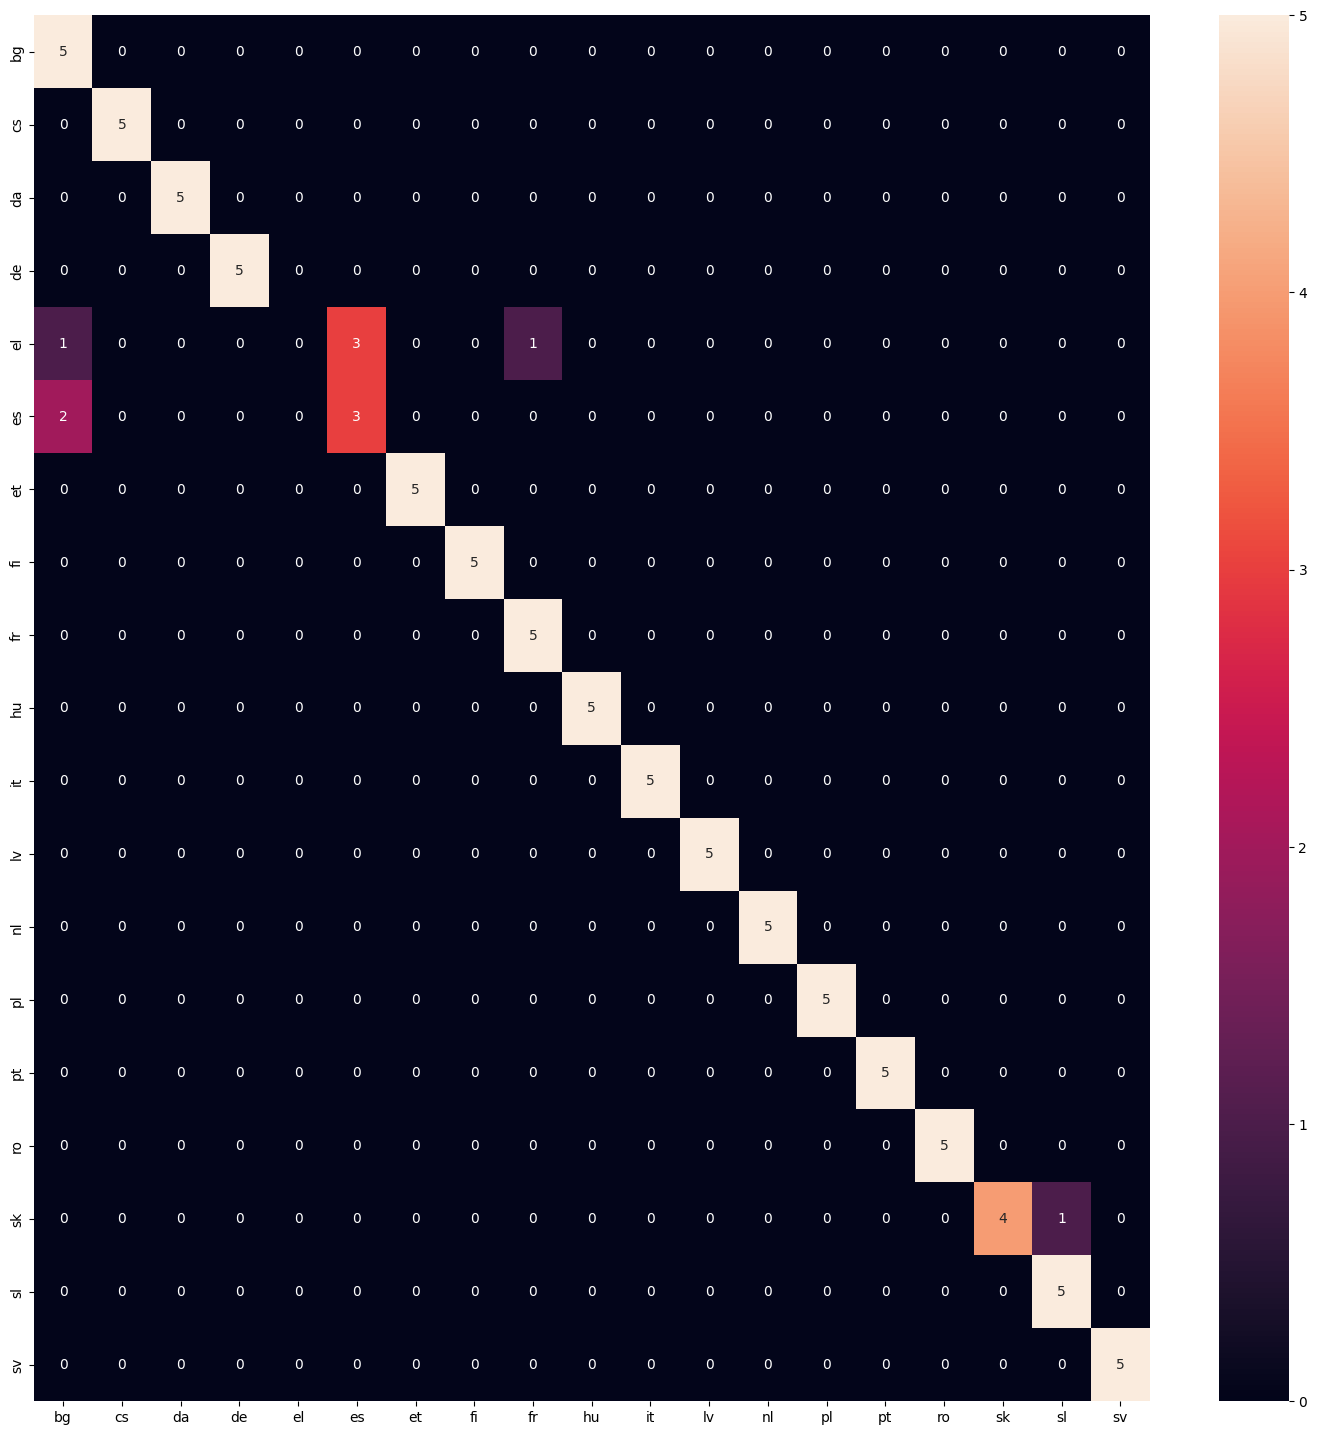

In [ ]:
import sklearn.metrics
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

conf_mat= sklearn.metrics.confusion_matrix(GT, PR, labels=None, sample_weight=None)
Labels_arr = ['bg', 'cs', 'da', 'de', 'el', 'es', 'et', 'fi', 'fr', 'hu', 'it', 'lv', 'nl', 'pl', 'pt', 'ro', 'sk', 'sl', 'sv']
#plot confusion matrix
%matplotlib inline
df_cm = pd.DataFrame(conf_mat, index = [i for i in Labels_arr], columns = [j for j in Labels_arr])
plt.figure(figsize = (18,18))
sn.heatmap(df_cm, annot=True)

print("Done lab 3")